# International Soccer Matches 

The dataset that I have chosen to study is a collection of the information of all of the international soccer matches played from the fist match between England and Scotland in 1872 until 30 September 2019.  The dataset was acquired from kaggle.com under the name "International football results from 1872 to 2019."  This dataset is updated as new matches occur so the scope of this research capstone is restricted to matches that occurred on or before 30 September 2019.

The dataset is provided in a .csv file format with column labels of "date," "home_team," "away_team," "home_score," "away_score," "tournament," "city," "country," and "neutral."  The "date" column is a string representation of the date on which the match occurred using a "YYYY-MM-DD" format.  The "home_team" and "away_team" columns contain strings with the names of the countries participating as the home and away teams, respectively.  From the background information given for this dataset, it is important to point out that the current name of a team is used to identify throughout history even though the team may have been known by a different name at a different point in time.  The example cited in the background information is that "Ireland" of 1882 is known as "Northern Ireland" in this dataset because Northern Ireland is the descendant team of the Ireland team that played in 1882.  The "home_score" and "away_score" columns provide the final score for the home team and away team, respectively.  The "tournament" gives the competition in which the match occurred.  For the purpose of the dataset, "Friendly" is an entry in this column to allow for friendly matches to be classified along with the matches occurring during tournaments.  The "city" and "country" columns provide information regarding the city and country in which the match occurred.  In contrast to the names of the teams, the country listed in the "country" column is the name of the country at the time of the match.  The "neutral" column contains boolean values that indicate whether the home team was playing in its home country.

This dataset is interesting to me because sports are a unifying element of society, and soccer is the world's most popular sport.  Soccer matches can often transcend political conflicts or strain because the general citzenry can often be accused of caring more about the outcomes of sporting events than the business of their governments.  That is simply an indication of the passion poured into sports--and soccer in particular due to its worldwide appeal.  Additionally, a lot of money is wagered on the outcomes of sporting events so insight into how certain variables impact the results of matches historically could be interesting and the subject of further research.

In order to use this dataset to perform analysis, it is loaded into this Jupyter Notebook as a DataFrame after the necessary modules have been imported.

## Load Data

In order to use this dataset to perform analysis, it is loaded into this Jupyter Notebook as a DataFrame after the necessary modules have been imported.

In [1]:
#standard module imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#command included for plot display
%matplotlib inline

#module imported for "floor" and "ceil" functions
import math

#dataset loaded into DataFrame
df = pd.read_csv(filepath_or_buffer='Soccer Results.csv')

## Preliminary Basic Inspection

In order to observe the dataset after it has been loaded into this Jupyter Notebook, basic DataFrame methods (.head(), .info(), .describe()) are applied to the DataFrame to provide information about the dataset.

In [2]:
df.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False


Applying the .head() method with an input parameter of 2 allows visualization of the top two entries in the DataFrame.  It is observed that the column names from the .csv file have been converted to column names in the DataFrame.  The rows from the .csv file have been added as entries into the DataFrame with automatically generated index numbers.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40945 entries, 0 to 40944
Data columns (total 9 columns):
date          40945 non-null object
home_team     40945 non-null object
away_team     40945 non-null object
home_score    40945 non-null int64
away_score    40945 non-null int64
tournament    40945 non-null object
city          40945 non-null object
country       40945 non-null object
neutral       40945 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


Appyling the .info() method shows that 40,945 matches exist in the dataset under consideration.  Furthermore, each column has the same number of non-null objects so every match is fully characterized under the attributes given by the column labels.

In [4]:
df.describe()

,home_score,away_score
count,40945.000000,40945.000000
mean,1.745463,1.188521
std,1.748619,1.405116
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


The numeric fields of the DataFrame are analyzed through the use of summary statistics by the .describe() method.  The scores of the matches are the only numeric fields so they are the only ones returned with summary statistics.  A notable result of the summary statistics is that the home scores more than half of a goal more than the away team on average.  However, the away team appears to produce more consistent performances than the home team, as indicated by a lower standard deviation.

## Pose Questions

The following questions are to be answered by this analysis:

    1)  How do teams playing in their home country fare?
    2)  Does the competition in which the match is played impact the goals scored or margin of victory in a match?
    3)  Which teams are the most successful?
    4)  How many teams have participated in an international soccer match and how many participate on a yearly basis?
    5)  Has the amount of goals scored in a typical match changed throughout time?

## Enhance Base DataFrame

To facilitate answering the questions listed above, the data provided in the dataset is insufficient or unwieldy.  For example, it would be useful to directly know which team wom rather than comparing the home score to the away score and then looking up the respective teams.  Therefore, columns for "total_goals," "margin_of_victory," "winner," "loser," and "year_of_match" are added to a copy of the original DataFrame below.

In [5]:
#make copy of original dataframe that will be modified with new columns
df2 = df.copy()

#total goals scored in each match calculated
df2['total_goals'] = df2['home_score'].values + df['away_score'].values
#margin of victory in each match calculated
df2['margin_of_victory'] = np.absolute(df2['home_score'].values - df['away_score'].values)

#initialize winner_by_match array; use df2['away_team'] because shape is the same
winner_by_match = df2['away_team'].values.copy()
#initialize loser_by_match array; use winner_by_match because shape is the same
loser_by_match = winner_by_match.copy()
#initialize year_of_match array; use np.zeros because array needs to store integers rather than strings
year_of_match = np.zeros(df2.shape[0])

#iterating through dataframe because conditional assignments need to be performed on the basis of logical comparisons
#for each match
for index, row in df2.iterrows():
    #logical comparison for when home team wins
    if (row['home_score'] > row['away_score']):
        winner_by_match[index] = row['home_team']
        loser_by_match[index] = row['away_team']
    #logical comparison for when away team wins
    elif (row['home_score'] < row['away_score']):
        winner_by_match[index] = row['away_team']
        loser_by_match[index] = row['home_team']
    #logical comparison for a draw--only remaining result after two previous conditions
    else:
        winner_by_match[index] = 'None'
        loser_by_match[index] = 'None'
    #year extracted from date by slicing the first four characters of string and casting to int
    year_of_match[index] = int(row['date'][:4])

#add arrays to dataframe as new columns
df2['winner'] = winner_by_match
df2['loser'] = loser_by_match
df2['year_of_match'] = year_of_match

## Question 1

In order to answer the first question regarding how teams fare when playing in their home countries, the number of wins, losses, and draws for the home team playing in its home country are determined.  Rather than the gross numbers of wins, losses, and draws, the percentages of each result type are presented, which are easier to interpret.  A pie chart is used to provide visualization of the frequency of result types with respect to each other.

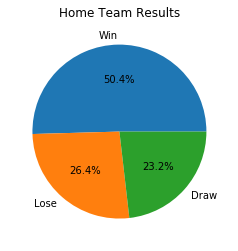

In [6]:
#filter base dataframe to create dataframe that only contains matched NOT played at a neutral site
#definition also avoids repeated filtering of base dataframe in home_wins, home_losses, and home_draws
non_neutral = df2.loc[~df2['neutral']]
#determine number of wins, losses, and draws by home teams
home_wins = non_neutral.loc[non_neutral['home_score'] > non_neutral['away_score']].shape[0]
home_losses = non_neutral.loc[non_neutral['home_score'] < non_neutral['away_score']].shape[0]
home_draws = non_neutral.loc[non_neutral['home_score'] == non_neutral['away_score']].shape[0]
#sum wins, losses, and draws by home team for total games
home_total_games = home_wins + home_losses + home_draws
#calculate percentages of each result type
home_win_percent = home_wins/home_total_games*100
home_loss_percent = home_losses/home_total_games*100
home_draw_percent = home_draws/home_total_games*100

#create pie chart showing win, loss, and draw percentages for home team
plt.pie(x=[home_win_percent, home_loss_percent, home_draw_percent], labels=['Win', 'Lose', 'Draw'], autopct='%.1f%%')
plt.title('Home Team Results')
plt.show()

Inspection of the pie charts shows that there is a significant advantage to being the home team in an international soccer match.  The home team is almost as likely to win as they are to draw or lose combined.  A potential question for further research would be to look at the success of teams in tournaments that they hosted versus tournaments that they did not host to see the difference between their results.  Additionally, the impact of a team being able to win bids to host tournaments on their overall team success could be studied.

## Question 2

Determining the impact of the tournament/competition in which a match was played on the number of goals scored in the match or the margin of victory could lead to quite a lengthy analysis.  The number of tournaments/competitions in which a match has been played is determined.

In [7]:
#generate list of all tournaments in which a match has been played
tournaments = df2['tournament'].unique()
#print the number of tournaments in which a match has been played
print('The number of tournaments/competitions in which a match has been played is ' + str(tournaments.shape[0]) + '.')

The number of tournaments/competitions in which a match has been played is 109.


In order to pare down the number of tournaments that are inspected to determine the impact of the tournament on the amount of goals scored and margin of victory in a match, the number of matches played in each tournament are determined.

In [8]:
#initialize games_played_by_tournament based on shape of tournaments series
games_played_by_tournament = np.zeros(tournaments.shape[0])

#loop through tournaments to count the number of matches played in each tournament
for index, tournament in enumerate(tournaments):
    #assign number of matches in tournament to its matching index in games_played_by_tournament
    games_played_by_tournament[index] = df2.loc[df2['tournament'] == tournament].shape[0]
    
#create dataframe from the series of tournaments and the array containing the number of matches played in each tournament
df_tournaments = pd.DataFrame({'tournament': tournaments, 'games_played': games_played_by_tournament})

After a DataFrame has been created that shows the number of matches played in each tournament, the tournaments with the top 10 most matches are presented.

In [9]:
#display tournaments with the top 10 most matches played
df_tournaments.sort_values(by=['games_played'], ascending=False).head(10)

,tournament,games_played
0,Friendly,16967.0
15,FIFA World Cup qualification,7100.0
28,UEFA Euro qualification,2482.0
31,African Cup of Nations qualification,1616.0
13,FIFA World Cup,900.0
7,Copa América,813.0
22,AFC Asian Cup qualification,724.0
25,African Cup of Nations,690.0
48,CECAFA Cup,620.0
51,CFU Caribbean Cup qualification,606.0


Of the top 10 competitions by number of matches played, only three--Friendly, FIFA World Cup Qualification, and FIFA World Cup--are played by the entire world.  The others are region-specific.  Therefore, these three are chosen for analysis of the variation of mean goals scored per game and mean margin of victory.  Additionally, all matches are analyzed as a group to compare to compare to the analyses of the three competitions.  Summary statistics are performed for all matches, friendly matches, FIFA World Cup Qualifying matches, and FIFA World Cup matches.

In [10]:
#summary statistics for each of the four cases
describe = df2.describe()
describe_friendly = df2.loc[df2['tournament'] == 'Friendly'].describe()
describe_FIFA_WCQ = df2.loc[df2['tournament'] == 'FIFA World Cup qualification'].describe()
describe_FIFA_WC = df2.loc[df2['tournament'] == 'FIFA World Cup'].describe()

Bar charts are used to compare the mean number of goals scored per match and mean margin of victory by competition.

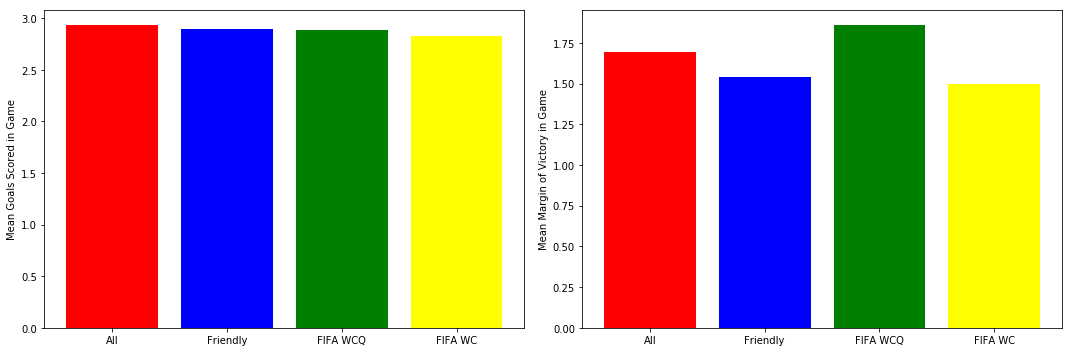

In [11]:
#initialize array to supply to plt.bar height argument
total_goals_means = np.zeros(4)
#extract mean goals per match from summary statistics
total_goals_means[0] = describe.loc['mean']['total_goals']
total_goals_means[1] = describe_friendly.loc['mean']['total_goals']
total_goals_means[2] = describe_FIFA_WCQ.loc['mean']['total_goals']
total_goals_means[3] = describe_FIFA_WC.loc['mean']['total_goals']

#initialize array to supply to plt.bar x argument
margin_of_victory_means = np.zeros(4)
#extract mean margin of victory from summary statistics
margin_of_victory_means[0] = describe.loc['mean']['margin_of_victory']
margin_of_victory_means[1] = describe_friendly.loc['mean']['margin_of_victory']
margin_of_victory_means[2] = describe_FIFA_WCQ.loc['mean']['margin_of_victory']
margin_of_victory_means[3] = describe_FIFA_WC.loc['mean']['margin_of_victory']

#resize figure for better display
plt.figure(figsize=(15, 5))

#plot bar chart to compare mean goals per match across competitions
plt.subplot(1, 2, 1)
plt.bar(x=['All', 'Friendly', 'FIFA WCQ', 'FIFA WC'], height=total_goals_means, color=['red', 'blue', 'green', 'yellow'])
plt.ylabel('Mean Goals Scored in Game')

#plot bar chart to compare mean margin of victory across competitions
plt.subplot(1, 2, 2)
plt.bar(x=['All', 'Friendly', 'FIFA WCQ', 'FIFA WC'], height=margin_of_victory_means, color=['red', 'blue', 'green', 'yellow'])
plt.ylabel('Mean Margin of Victory in Game')

#improve display
plt.tight_layout()
#show plot
plt.show()

From the bar plot showing the mean goals scored per game for the four cases, it is observed that there is not a lot of variability in mean goals scored per game between the four cases.  Games in the FIFA World Cup have the lowest mean goals scored per game of the four cases.  This potentially suggests that defense is emphasized more during these matches, which makes sense given that the stakes of this competition are the greatest in international soccer and that each has game has a heightened importance due to the knockout nature of the competition.  Inspection of the bar plot showing the mean margin of victory for the four cases, FIFA World Cup Qualifying is observed to have the greatest margin of victory while the FIFA World Cup has the lowest margin of victory.  The mean margin of victory of all matches and friendlies--the two cases with the most matches--is between the mean margins of victory for FIFA World Cup Qualifying and the FIFA World Cup.  It makes sense that the FIFA World Cup has a lower margin of victory than the other cases because it is a tournament in which the best teams from each confederation within FIFA play.  Therefore, good teams are playing against other good teams with a reduced likelihood of blowouts.  The elevated mean margin of victory in FIFA World Cup Qualifying matches could be explained by the fact that these matches are contested within each confederation to determine which teams are the best in the confederation.  This means that the weaker teams in each confederation end up playing the better teams in each confederation.  Such matchups provide the opportunity for matches with high margins of victory that can elevate the mean margin of victory.

In addition to comparing the means, histograms are generated for the goals scored per match and margin of victory for each case.

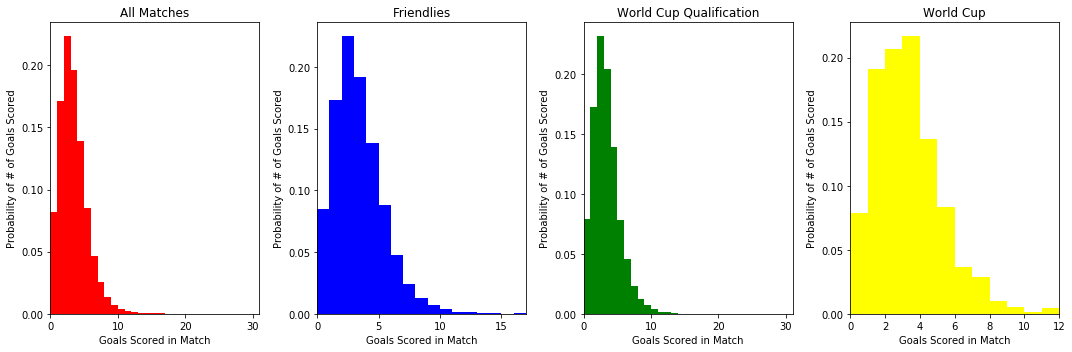

In [12]:
#get goals scored in match for each case
total_goals = df2['total_goals']
total_goals_friendly = df2.loc[df2['tournament'] == 'Friendly']['total_goals']
total_goals_FIFA_WCQ = df2.loc[df2['tournament'] == 'FIFA World Cup qualification']['total_goals']
total_goals_FIFA_WC = df2.loc[df2['tournament'] == 'FIFA World Cup']['total_goals']

#resize figure for better display
plt.figure(figsize=(15, 5))

#plot histogram for goals scored in all matches
plt.subplot(1, 4, 1)
plt.hist(x=total_goals, bins=((total_goals.max() - total_goals.min())), color='red', density=True)
plt.xlabel('Goals Scored in Match')
plt.ylabel('Probability of # of Goals Scored')
plt.title('All Matches')
plt.xlim([total_goals.min(), total_goals.max()])

#plot histogram for goals scored in friendlies
plt.subplot(1, 4, 2)
plt.hist(x=total_goals_friendly, bins=((total_goals_friendly.max() - total_goals_friendly.min())),
         color='blue', density=True)
plt.xlabel('Goals Scored in Match')
plt.ylabel('Probability of # of Goals Scored')
plt.title('Friendlies')
plt.xlim([total_goals_friendly.min(), total_goals_friendly.max()])

#plot histogram for goals scored in FIFA World Cup Qualifying
plt.subplot(1, 4, 3)
plt.hist(x=total_goals_FIFA_WCQ, bins=((total_goals_FIFA_WCQ.max() - total_goals_FIFA_WCQ.min())),
         color='green', density=True)
plt.xlabel('Goals Scored in Match')
plt.ylabel('Probability of # of Goals Scored')
plt.title('World Cup Qualification')
plt.xlim([total_goals_FIFA_WCQ.min(), total_goals_FIFA_WCQ.max()])

#plot histogram for goals scored in FIFA World Cup
plt.subplot(1, 4, 4)
plt.hist(x=total_goals_FIFA_WC, bins=((total_goals_FIFA_WC.max() - total_goals_FIFA_WC.min())),
         color='yellow', density=True)
plt.xlabel('Goals Scored in Match')
plt.ylabel('Probability of # of Goals Scored')
plt.title('World Cup')
plt.xlim([total_goals_FIFA_WC.min(), total_goals_FIFA_WC.max()])
            
#improve display
plt.tight_layout()
#show plot
plt.show()

The histograms show that the goals scored per game follows a Gaussian-type or binomial-type distribution in which the probability increases along the x-axis toward a maximum after which it decays with a longer tail to the right of the maximum.  Each of the cases is observed to have insignificant (<1%) occurrences of goals scored in a game beyond 10 goals scored.  In order to homogenize the visualizations across competitions, the limits of the x-axes are changed to be 0 and 10, and the limits of the y-axes are changed to be 0 and 0.25.

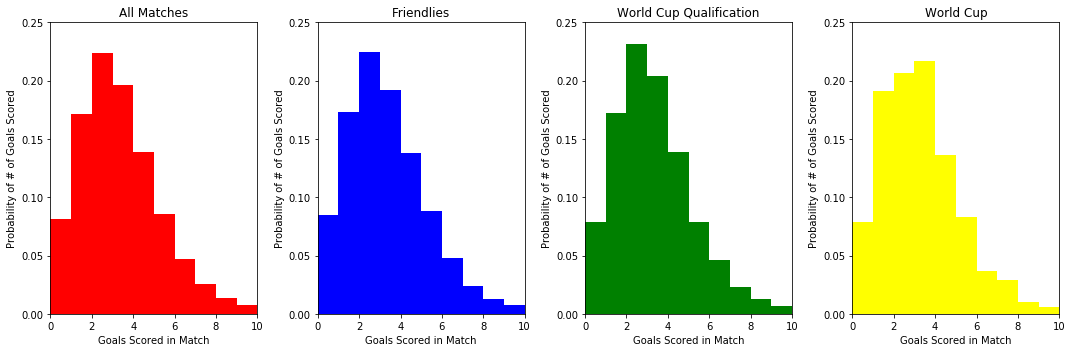

In [13]:
#resize figure for better display
plt.figure(figsize=(15, 5))

#plot histogram for goals scored in all matches
plt.subplot(1, 4, 1)
plt.hist(x=total_goals, bins=((total_goals.max() - total_goals.min())), color='red', density=True)
plt.xlabel('Goals Scored in Match')
plt.ylabel('Probability of # of Goals Scored')
plt.title('All Matches')
plt.xlim([0, 10])
plt.ylim([0, 0.25])

#plot histogram for goals scored in friendlies
plt.subplot(1, 4, 2)
plt.hist(x=total_goals_friendly, bins=((total_goals_friendly.max() - total_goals_friendly.min())),
         color='blue', density=True)
plt.xlabel('Goals Scored in Match')
plt.ylabel('Probability of # of Goals Scored')
plt.title('Friendlies')
plt.xlim([0, 10])
plt.ylim([0, 0.25])

#plot histogram for goals scored in FIFA World Cup Qualifying
plt.subplot(1, 4, 3)
plt.hist(x=total_goals_FIFA_WCQ, bins=((total_goals_FIFA_WCQ.max() - total_goals_FIFA_WCQ.min())),
         color='green', density=True)
plt.xlabel('Goals Scored in Match')
plt.ylabel('Probability of # of Goals Scored')
plt.title('World Cup Qualification')
plt.xlim([0, 10])
plt.ylim([0, 0.25])

#plot histogram for goals scored in FIFA World Cup
plt.subplot(1, 4, 4)
plt.hist(x=total_goals_FIFA_WC, bins=((total_goals_FIFA_WC.max() - total_goals_FIFA_WC.min())),
         color='yellow', density=True)
plt.xlabel('Goals Scored in Match')
plt.ylabel('Probability of # of Goals Scored')
plt.title('World Cup')
plt.xlim([0, 10])
plt.ylim([0, 0.25])
            
#improve display
plt.tight_layout()
#show plot
plt.show()

Inspection of the histograms shows that they are similar, which is supported by the comparisons of the mean goals scored per match.  The difference in mean goals per match could be accounted for by the low-probability results with a high number of goals scored that exist to a greater extent for all matches, friendlies, and FIFA World Cup Qualifying than for FIFA World Cup matches.  Those high-scoring results are able to elevate the mean goals scored per match.  The histograms of all matches, friendlies, and FIFA World Cup Qualification are similar based on visual inspection.  The FIFA World Cup histogram is not very different from the first three but is more level across the 1, 2, and 3 goals scored bins than the other three.

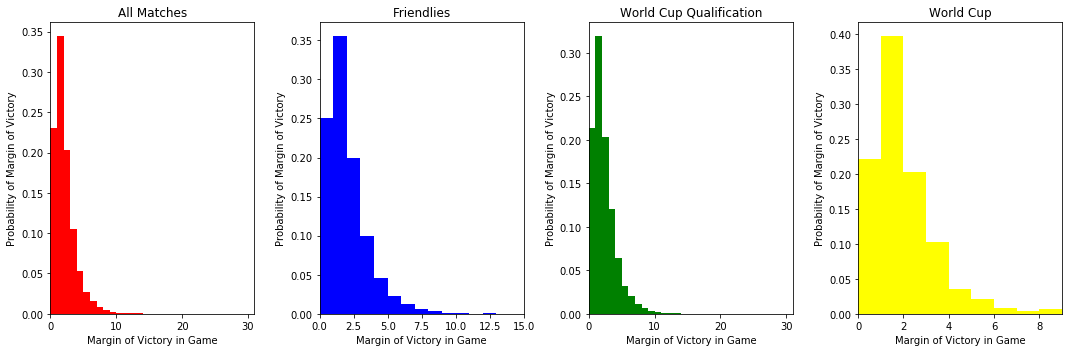

In [14]:
#get margin of victory of matches for each case
margin_of_victory = df2['margin_of_victory']
margin_of_victory_friendly = df2.loc[df2['tournament'] == 'Friendly']['margin_of_victory']
margin_of_victory_FIFA_WCQ = df2.loc[df2['tournament'] == 'FIFA World Cup qualification']['margin_of_victory']
margin_of_victory_FIFA_WC = df2.loc[df2['tournament'] == 'FIFA World Cup']['margin_of_victory']

#resize figure for better display
plt.figure(figsize=(15, 5))

#plot histogram for margin of victory in all matches
plt.subplot(1, 4, 1)
plt.hist(x=margin_of_victory, bins=((margin_of_victory.max() - margin_of_victory.min())),
         color='red', density=True)
plt.xlabel('Margin of Victory in Game')
plt.ylabel('Probability of Margin of Victory')
plt.title('All Matches')
plt.xlim([margin_of_victory.min(), margin_of_victory.max()])

#plot histogram for margin of victory in friendlies
plt.subplot(1, 4, 2)
plt.hist(x=margin_of_victory_friendly, bins=((margin_of_victory_friendly.max() - margin_of_victory_friendly.min())),
         color='blue', density=True)
plt.xlabel('Margin of Victory in Game')
plt.ylabel('Probability of Margin of Victory')
plt.title('Friendlies')
plt.xlim([margin_of_victory_friendly.min(), margin_of_victory_friendly.max()])

#plot histogram for margin of victory in FIFA World Cup Qualifying
plt.subplot(1, 4, 3)
plt.hist(x=margin_of_victory_FIFA_WCQ, bins=((margin_of_victory_FIFA_WCQ.max() - margin_of_victory_FIFA_WCQ.min())),
         color='green', density=True)
plt.xlabel('Margin of Victory in Game')
plt.ylabel('Probability of Margin of Victory')
plt.title('World Cup Qualification')
plt.xlim([margin_of_victory_FIFA_WCQ.min(), margin_of_victory_FIFA_WCQ.max()])

#plot histogram for margin of victory in FIFA World Cup
plt.subplot(1, 4, 4)
plt.hist(x=margin_of_victory_FIFA_WC, bins=((margin_of_victory_FIFA_WC.max() - margin_of_victory_FIFA_WC.min())),
         color='yellow', density=True)
plt.xlabel('Margin of Victory in Game')
plt.ylabel('Probability of Margin of Victory')
plt.title('World Cup')
plt.xlim([margin_of_victory_FIFA_WC.min(), margin_of_victory_FIFA_WC.max()])
            
#improve display
plt.tight_layout()
#show plot
plt.show()

The histograms show that the margin of victory follows a Gaussian-type or binomial-type distribution similarly to the goals scored per game.  Each of the cases is observed to have insignificant (<1%) occurrences of margin of victory beyond 10.  In order to homogenize the visualizations across competitions, the limits of the x-axes are changed to be 0 and 10, and the limits of the y-axes are changed to be 0 and 0.40.

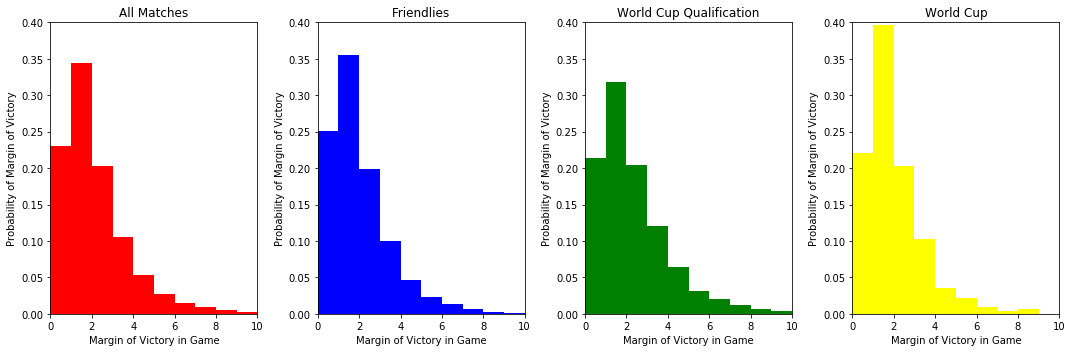

In [15]:
#resize figure for better display
plt.figure(figsize=(15, 5))

#plot histogram for margin of victory in all matches
plt.subplot(1, 4, 1)
plt.hist(x=margin_of_victory, bins=((margin_of_victory.max() - margin_of_victory.min())),
         color='red', density=True)
plt.xlabel('Margin of Victory in Game')
plt.ylabel('Probability of Margin of Victory')
plt.title('All Matches')
plt.xlim([0, 10])
plt.ylim([0, 0.40])

#plot histogram for margin of victory in friendlies
plt.subplot(1, 4, 2)
plt.hist(x=margin_of_victory_friendly, bins=((margin_of_victory_friendly.max() - margin_of_victory_friendly.min())),
         color='blue', density=True)
plt.xlabel('Margin of Victory in Game')
plt.ylabel('Probability of Margin of Victory')
plt.title('Friendlies')
plt.xlim([0, 10])
plt.ylim([0, 0.40])

#plot histogram for margin of victory in FIFA World Cup Qualifying
plt.subplot(1, 4, 3)
plt.hist(x=margin_of_victory_FIFA_WCQ, bins=((margin_of_victory_FIFA_WCQ.max() - margin_of_victory_FIFA_WCQ.min())),
         color='green', density=True)
plt.xlabel('Margin of Victory in Game')
plt.ylabel('Probability of Margin of Victory')
plt.title('World Cup Qualification')
plt.xlim([0, 10])
plt.ylim([0, 0.40])

#plot histogram for margin of victory in FIFA World Cup
plt.subplot(1, 4, 4)
plt.hist(x=margin_of_victory_FIFA_WC, bins=((margin_of_victory_FIFA_WC.max() - margin_of_victory_FIFA_WC.min())),
         color='yellow', density=True)
plt.xlabel('Margin of Victory in Game')
plt.ylabel('Probability of Margin of Victory')
plt.title('World Cup')
plt.xlim([0, 10])
plt.ylim([0, 0.40])
            
#improve display
plt.tight_layout()
#show plot
plt.show()

The histograms of the margin of victory for the four cases share a similar shape.  However, there are differences that can be observed.  One such difference is is greater probability of a draw occurring in a friendly match than in the other cases.  This aligns with expectation because there are no stakes for a friendly and because all friendlies can end in a draw.  Some matches in the other three cases cannot end in a draw.  Similar reasoning could explain why the FIFA World Cup has has a greater probability of a match with a 1 goal margin of victory.  Knockout matches in the FIFA World Cup must have a winner, and time and subsequently penalty kicks are added until there is a winner.  Friendlies and FIFA World Cup Qualification do not have this feature, and FIFA World Cup matches represent a small segment of the all matches population.  In order to determine whether there is a significant difference between the distribution of margin of victory for World Cup matches and friendly matches or for World Cup matches and World Cup Qualification matches, the Mann-Whitney U test is employed because the distributions are not normal.

In [16]:
from scipy.stats import mannwhitneyu

MWU_margin_friendly_WC = mannwhitneyu(margin_of_victory_friendly, margin_of_victory_FIFA_WC)
MWU_margin_WCQ_WC = mannwhitneyu(margin_of_victory_FIFA_WCQ, margin_of_victory_FIFA_WC)
print('The p-value for comparison of the distribution of the margin of victory in friendly matches ' + 
      'and World Cup matches is ' + str(MWU_margin_friendly_WC[1])[:4] + '.')
print('The p-value for comparison of the distribution of the margin of victory in World Cup Qualifying matches ' + 
      'and World Cup matches is ' + str(MWU_margin_WCQ_WC[1])[:4])

The p-value for comparison of the distribution of the margin of victory in friendly matches and World Cup matches is 0.42.
The p-value for comparison of the distribution of the margin of victory in World Cup Qualifying matches and World Cup matches is 1.26


In [17]:
MWU_margin_WCQ_WC

MannwhitneyuResult(statistic=2896430.0, pvalue=1.2603786615749097e-06)

From the p-values obtained from the Mann-Whitney U test, it is observed that a difference cannot be confirmed between the distributions of margin of victory for friendly matches and World Cup matches, but a difference in the distributions of margin of victory for World Cup Qualifying matches and World Cup matches can be confirmed.

## Question 3

In order to determine which teams are the most successful teams, their records need to be calculated based on the results of their matches.  This is done for all matches as well as for the FIFA World Cup.  As the FIFA World Cup is the most prestigious tournament in world soccer and is open to every team in world soccer, it is included because it is logical that the most successful teams would be successful in this tournament.

In [18]:
#generate list of teams that have played an international soccer match
teams = pd.DataFrame(np.append(df.home_team.values, df.away_team.values))[0].unique()

#initialize array for the year in which a team first played international match (for Question 4, efficient to do here)
#initialize arrays for wins, losses, draws, percentages thereof, and games in all matches for each team
year_first_played = np.zeros(teams.shape[0])
wins = year_first_played.copy()
losses = year_first_played.copy()
draws = year_first_played.copy()
games = year_first_played.copy()
wins_pct = year_first_played.copy()
losses_pct = year_first_played.copy()
draws_pct = year_first_played.copy()

#initialize arrays for wins, losses, draws, percentages thereof, and games in FIFA World Cup matches for each team
wins_WC = year_first_played.copy()
losses_WC = year_first_played.copy()
draws_WC = year_first_played.copy()
games_WC = year_first_played.copy()
wins_WC_pct = year_first_played.copy()
losses_WC_pct = year_first_played.copy()
draws_WC_pct = year_first_played.copy()

#loop through teams for efficient application of filters
for index, team in enumerate(teams):
    #generate dataframe for matches in which the team participated
    matches_with_team = df2.loc[(df2['home_team'] == team) | (df2['away_team'] == team)]
    
    #determine year in which team first competed in international match, supports Question 4
    year_first_played[index] = matches_with_team.sort_values(by=['year_of_match'])['year_of_match'].values[0]
    
    #determine number of wins, losses, draws, and games in all matches for team
    wins[index] = matches_with_team.loc[matches_with_team['winner'] == team].shape[0]
    losses[index] = matches_with_team.loc[matches_with_team['loser'] == team].shape[0]
    draws[index] = matches_with_team.loc[matches_with_team['winner'] == 'None'].shape[0]
    games[index] = matches_with_team.shape[0]
    
    #calculate win, loss, and draw percentage, done this way instead of through matrix to prevent dividing by 0 in WC case
    if (games[index] == 0):
        wins_pct[index] = 0
        losses_pct[index] = 0
        draws_pct[index] = 0
    else:
        wins_pct[index] = wins[index]/games[index]*100
        losses_pct[index] = losses[index]/games[index]*100
        draws_pct[index] = draws[index]/games[index]*100
    
    #determine number of wins, losses, draws, and games in WC for team
    matches_with_team_WC = matches_with_team.loc[matches_with_team['tournament'] == 'FIFA World Cup']
    wins_WC[index] = matches_with_team_WC.loc[matches_with_team['winner'] == team].shape[0]
    losses_WC[index] = matches_with_team_WC.loc[matches_with_team['loser'] == team].shape[0]
    draws_WC[index] = matches_with_team_WC.loc[matches_with_team['winner'] == 'None'].shape[0]
    games_WC[index] = matches_with_team_WC.shape[0]
    
    #calculate win, loss, and draw percentage in WC, done this way instead of through matrix to prevent dividing by 0
    if (games_WC[index] == 0):
        wins_WC_pct[index] = 0
        losses_WC_pct[index] = 0
        draws_WC_pct[index] = 0
    else:
        wins_WC_pct[index] = wins_WC[index]/games_WC[index]*100
        losses_WC_pct[index] = losses_WC[index]/games_WC[index]*100
        draws_WC_pct[index] = draws_WC[index]/games_WC[index]*100

#create dataframe that summarizes each team's results
df_team_summary = pd.DataFrame({'team': teams, 'year_first_played': year_first_played, 'wins': wins, 'losses': losses, 'draws': 
                          draws, 'games': games, 'wins_pct': wins_pct, 'losses_pct': losses_pct, 'draws_pct': draws_pct, 'wins_WC': wins_WC, 'losses_WC':
                           losses_WC, 'draws_WC': draws_WC, 'games_WC': games_WC, 'wins_WC_pct': wins_WC_pct, 'losses_WC_pct':
                           losses_WC_pct, 'draws_WC_pct': draws_WC_pct})

The top 10 teams by winning percentage are displayed so that the list can be inspected.

In [19]:
df_team_summary.sort_values(by=['wins_pct'], ascending=False).head(10)

,team,year_first_played,wins,losses,draws,games,wins_pct,losses_pct,draws_pct,wins_WC,losses_WC,draws_WC,games_WC,wins_WC_pct,losses_WC_pct,draws_WC_pct
314,Surrey,2018.0,1.0,0.0,0.0,1.0,100.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
311,Asturias,1923.0,1.0,0.0,0.0,1.0,100.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
310,St Kitts and Nevis,2019.0,1.0,0.0,0.0,1.0,100.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
234,Canary Islands,1996.0,3.0,1.0,0.0,4.0,75.000000,25.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
298,Yorkshire,2018.0,5.0,1.0,1.0,7.0,71.428571,14.285714,14.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0
272,Padania,2008.0,29.0,6.0,8.0,43.0,67.441860,13.953488,18.604651,0.0,0.0,0.0,0.0,0.0,0.0,0.0
217,Jersey,1991.0,55.0,16.0,11.0,82.0,67.073171,19.512195,13.414634,0.0,0.0,0.0,0.0,0.0,0.0,0.0
305,Parishes of Jersey,2018.0,2.0,1.0,0.0,3.0,66.666667,33.333333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
288,County of Nice,2014.0,6.0,2.0,1.0,9.0,66.666667,22.222222,11.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,Basque Country,1915.0,37.0,9.0,11.0,57.0,64.912281,15.789474,19.298246,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Inspection of the top 10 teams by winning percentage shows that teams with relatively few games played have the highest winning percentages.  None of these teams are teams that are associated with success in world soccer.  Therefore, winning percentage alone is not a good indicator of team success on an international scale.  Next the top 10 teams by wins are displayed.

In [20]:
df_team_summary.sort_values(by=['wins'], ascending=False).head(10)

,team,year_first_played,wins,losses,draws,games,wins_pct,losses_pct,draws_pct,wins_WC,losses_WC,draws_WC,games_WC,wins_WC_pct,losses_WC_pct,draws_WC_pct
25,Brazil,1914.0,625.0,157.0,197.0,979.0,63.840654,16.036772,20.122574,73.0,18.0,18.0,109.0,66.972477,16.513761,16.513761
1,England,1872.0,565.0,190.0,241.0,996.0,56.726908,19.076305,24.196787,29.0,19.0,21.0,69.0,42.028986,27.536232,30.434783
15,Germany,1908.0,552.0,199.0,193.0,944.0,58.474576,21.080508,20.444915,67.0,22.0,20.0,109.0,61.467890,20.183486,18.348624
8,Argentina,1902.0,525.0,211.0,241.0,977.0,53.735926,21.596725,24.667349,43.0,23.0,15.0,81.0,53.086420,28.395062,18.518519
14,Sweden,1908.0,495.0,293.0,224.0,1012.0,48.913043,28.952569,22.134387,19.0,19.0,13.0,51.0,37.254902,37.254902,25.490196
102,South Korea,1949.0,449.0,185.0,220.0,854.0,52.576112,21.662763,25.761124,6.0,19.0,9.0,34.0,17.647059,55.882353,26.470588
47,Mexico,1923.0,434.0,230.0,200.0,864.0,50.231481,26.620370,23.148148,16.0,27.0,14.0,57.0,28.070175,47.368421,24.561404
7,Hungary,1902.0,433.0,289.0,202.0,924.0,46.861472,31.277056,21.861472,15.0,14.0,3.0,32.0,46.875000,43.750000,9.375000
16,Italy,1910.0,420.0,153.0,224.0,797.0,52.697616,19.196989,28.105395,45.0,17.0,21.0,83.0,54.216867,20.481928,25.301205
10,France,1904.0,414.0,245.0,177.0,836.0,49.521531,29.306220,21.172249,34.0,19.0,13.0,66.0,51.515152,28.787879,19.696970


None of the teams presented in the top 10 by winning percentage are present in the top 10 by number of wins.  However, using wins alone does not indicate a team's success because it favors teams that have played more matches.  A team with a lower winning percentage could have more wins that a team with a greater winning percentage that has played fewer matches.  Within the top 10 by wins, England is ahead of Germany even though Germany has a greater winning percentage because England has played 52 more matches than Germany.  Similarly, Sweden is ranked 5th by wins even though four of the five teams below it in the top 10 by wins have better winning percentages.  In order to filter out the winning percentages of teams with relatively few matches played, the top 10 teams by winning percentage with more than 100 matches played are presented.

In [21]:
df_team_summary.loc[df_team_summary['games'] > 100].sort_values(by=['wins_pct'], ascending=False).head(10)

,team,year_first_played,wins,losses,draws,games,wins_pct,losses_pct,draws_pct,wins_WC,losses_WC,draws_WC,games_WC,wins_WC_pct,losses_WC_pct,draws_WC_pct
25,Brazil,1914.0,625.0,157.0,197.0,979.0,63.840654,16.036772,20.122574,73.0,18.0,18.0,109.0,66.972477,16.513761,16.513761
32,Spain,1921.0,404.0,130.0,156.0,690.0,58.550725,18.840580,22.608696,30.0,18.0,15.0,63.0,47.619048,28.571429,23.809524
15,Germany,1908.0,552.0,199.0,193.0,944.0,58.474576,21.080508,20.444915,67.0,22.0,20.0,109.0,61.467890,20.183486,18.348624
1,England,1872.0,565.0,190.0,241.0,996.0,56.726908,19.076305,24.196787,29.0,19.0,21.0,69.0,42.028986,27.536232,30.434783
92,Iran,1941.0,270.0,97.0,128.0,495.0,54.545455,19.595960,25.858586,2.0,9.0,4.0,15.0,13.333333,60.000000,26.666667
227,Czech Republic,1993.0,158.0,76.0,59.0,293.0,53.924915,25.938567,20.136519,1.0,2.0,0.0,3.0,33.333333,66.666667,0.000000
8,Argentina,1902.0,525.0,211.0,241.0,977.0,53.735926,21.596725,24.667349,43.0,23.0,15.0,81.0,53.086420,28.395062,18.518519
80,Croatia,1940.0,167.0,63.0,84.0,314.0,53.184713,20.063694,26.751592,11.0,8.0,4.0,23.0,47.826087,34.782609,17.391304
105,New Caledonia,1951.0,120.0,80.0,27.0,227.0,52.863436,35.242291,11.894273,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
16,Italy,1910.0,420.0,153.0,224.0,797.0,52.697616,19.196989,28.105395,45.0,17.0,21.0,83.0,54.216867,20.481928,25.301205


The resulting list presents teams associated with success in international socces (Brazil, Spain, Germany) even though teams like Iran and New Caledonia still make this top 10.  A possible cause of their high winning percentages could be that the both teams play in confederations that are traditionally not very strong in comparison to the other confederations.  Wins and winning percentage at the World Cup provide a good measure of a team's success because it had to do well in qualifying to even be in the World Cup and because the competition at the World Cup is elite.  The top 10 teams by World Cup wins and World Cup winning percentage are displayed.

In [22]:
df_team_summary.sort_values(by=['wins_WC'], ascending=False).head(10)

,team,year_first_played,wins,losses,draws,games,wins_pct,losses_pct,draws_pct,wins_WC,losses_WC,draws_WC,games_WC,wins_WC_pct,losses_WC_pct,draws_WC_pct
25,Brazil,1914.0,625.0,157.0,197.0,979.0,63.840654,16.036772,20.122574,73.0,18.0,18.0,109.0,66.972477,16.513761,16.513761
15,Germany,1908.0,552.0,199.0,193.0,944.0,58.474576,21.080508,20.444915,67.0,22.0,20.0,109.0,61.467890,20.183486,18.348624
16,Italy,1910.0,420.0,153.0,224.0,797.0,52.697616,19.196989,28.105395,45.0,17.0,21.0,83.0,54.216867,20.481928,25.301205
8,Argentina,1902.0,525.0,211.0,241.0,977.0,53.735926,21.596725,24.667349,43.0,23.0,15.0,81.0,53.086420,28.395062,18.518519
10,France,1904.0,414.0,245.0,177.0,836.0,49.521531,29.306220,21.172249,34.0,19.0,13.0,66.0,51.515152,28.787879,19.696970
32,Spain,1921.0,404.0,130.0,156.0,690.0,58.550725,18.840580,22.608696,30.0,18.0,15.0,63.0,47.619048,28.571429,23.809524
1,England,1872.0,565.0,190.0,241.0,996.0,56.726908,19.076305,24.196787,29.0,19.0,21.0,69.0,42.028986,27.536232,30.434783
11,Netherlands,1905.0,395.0,209.0,176.0,780.0,50.641026,26.794872,22.564103,27.0,11.0,12.0,50.0,54.000000,22.000000,24.000000
5,Uruguay,1902.0,380.0,286.0,214.0,880.0,43.181818,32.500000,24.318182,24.0,20.0,12.0,56.0,42.857143,35.714286,21.428571
9,Belgium,1904.0,329.0,271.0,164.0,764.0,43.062827,35.471204,21.465969,20.0,19.0,9.0,48.0,41.666667,39.583333,18.750000


In [23]:
df_team_summary.sort_values(by=['wins_WC_pct'], ascending=False).head(10)

,team,year_first_played,wins,losses,draws,games,wins_pct,losses_pct,draws_pct,wins_WC,losses_WC,draws_WC,games_WC,wins_WC_pct,losses_WC_pct,draws_WC_pct
25,Brazil,1914.0,625.0,157.0,197.0,979.0,63.840654,16.036772,20.122574,73.0,18.0,18.0,109.0,66.972477,16.513761,16.513761
15,Germany,1908.0,552.0,199.0,193.0,944.0,58.474576,21.080508,20.444915,67.0,22.0,20.0,109.0,61.467890,20.183486,18.348624
16,Italy,1910.0,420.0,153.0,224.0,797.0,52.697616,19.196989,28.105395,45.0,17.0,21.0,83.0,54.216867,20.481928,25.301205
11,Netherlands,1905.0,395.0,209.0,176.0,780.0,50.641026,26.794872,22.564103,27.0,11.0,12.0,50.0,54.000000,22.000000,24.000000
8,Argentina,1902.0,525.0,211.0,241.0,977.0,53.735926,21.596725,24.667349,43.0,23.0,15.0,81.0,53.086420,28.395062,18.518519
10,France,1904.0,414.0,245.0,177.0,836.0,49.521531,29.306220,21.172249,34.0,19.0,13.0,66.0,51.515152,28.787879,19.696970
45,Turkey,1923.0,218.0,210.0,135.0,563.0,38.721137,37.300178,23.978686,5.0,4.0,1.0,10.0,50.000000,40.000000,10.000000
80,Croatia,1940.0,167.0,63.0,84.0,314.0,53.184713,20.063694,26.751592,11.0,8.0,4.0,23.0,47.826087,34.782609,17.391304
32,Spain,1921.0,404.0,130.0,156.0,690.0,58.550725,18.840580,22.608696,30.0,18.0,15.0,63.0,47.619048,28.571429,23.809524
34,Poland,1921.0,347.0,258.0,206.0,811.0,42.786683,31.812577,25.400740,16.0,13.0,5.0,34.0,47.058824,38.235294,14.705882


Brazil has clearly positioned itself as the most successful team in international soccer by virtue of having the most wins, highest winning percentage in all matches among teams playing more than 100 matches, most World Cup wins, and highest World Cup winning percentage.  Germany has positioned itself as a strong contender to Brazil by having the third-most wins overall, third-highest winning percentage among teams playing more than 100 matches, the second-most World Cup wins, and the second-best World Cup winning percentage.  Spain narrowly eclipses Germany in winning percentage among teams playing more than 100 matches but falls short of Germany's success in the World Cup.  Spain only has the sixth-most World Cup wins and ninth-best World Cup winning percentage.

## Question 4

The DataFrame created in the process of answering Question 3 (df_team_summary) answers the question of how many teams have competed in an international soccer match throughout history by virtue of its shape.  There is a row in df_team_summary for each team.  The number of teams that have competed in an international soccer match throughout history is determined below.

In [24]:
print('The number of teams that have played in an international soccer match is ' + str(df_team_summary.shape[0]) + '.')

The number of teams that have played in an international soccer match is 315.


Next, the number of teams that had played an international soccer match by the end of given year and the number of teams that played an international soccer match in a given year are determined.

In [25]:
#initialize teams_over_years to have the number of rows corresponding to years from first match to last match
teams_over_years = np.zeros((int(df_team_summary['year_first_played'].max())
                             - int(df_team_summary['year_first_played'].min()) + 1, 4))

#initialize mean_goals_over_years to have same shape as teams_over_years, efficient to do here, used for Question 5
mean_goals_over_years = np.zeros(teams_over_years.shape[0])

#loop through years to determine cumulative teams and teams in year
for index, year in enumerate(range(int(df_team_summary['year_first_played'].min()), 
                                   int(df_team_summary['year_first_played'].max()) + 1)):
    #store year in first column of array
    teams_over_years[index, 0] = year
    #store count of teams who first played in year in second column of array
    teams_over_years[index, 1] = df_team_summary.loc[df_team_summary['year_first_played'] == year].shape[0]
    #store cumulative number of teams who had played an international match by year in third column of array
    if (index == 0):
        teams_over_years[index, 2] = teams_over_years[index, 1]
    else:
        teams_over_years[index, 2] = teams_over_years[index - 1, 2] + teams_over_years[index, 1]
    
    #generate dataframe for matches in year
    matches_in_year = df2.loc[df2['year_of_match'] == year]
        
    #determine number of teams that played match in year
    teams_over_years[index, 3] = matches_in_year['home_team'].append(matches_in_year['away_team']).unique().shape[0]
        
    #calculate mean number of goals in matches in year, used for Question 5
    mean_goals_over_years[index] = df2.loc[df2['year_of_match'] == year]['total_goals'].describe()['mean']

Scatter plots of the number of teams that had played an international match by a given year and the number of teams playing an international match in each year are generated.

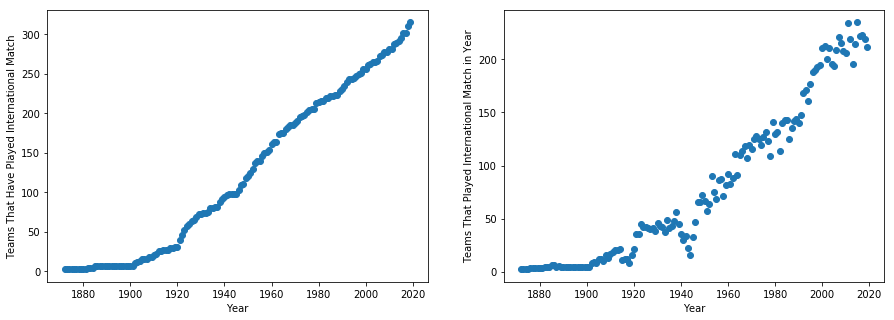

In [26]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(teams_over_years[:,0], teams_over_years[:,2])
plt.xlabel('Year')
plt.ylabel('Teams That Have Played International Match')

plt.subplot(1, 2, 2)
plt.scatter(teams_over_years[:,0], teams_over_years[:,3])
plt.xlabel('Year')
plt.ylabel('Teams That Played International Match in Year')

plt.show()

The two plots generally share a similar shape and track closely with each other.  An interesting observation from these plots is the significant increase in the plotted value after the ends of World War I and World War II.  This stands to reason because those events were very disruptive, but it is interesting to see how soccer is connected to the events of history.

## Question 5

The mean number of goals scored in a match for each year is plotted below.

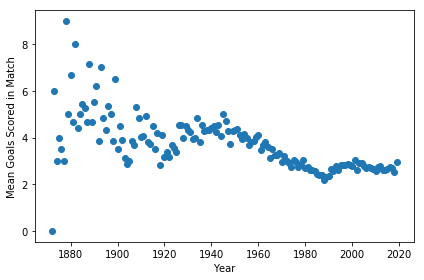

In [27]:
plt.scatter(teams_over_years[:,0], mean_goals_over_years)
plt.xlabel('Year')
plt.ylabel('Mean Goals Scored in Match')

plt.tight_layout()
plt.show()

It is clear from the plot above that the number of goals scored per match has trended down through history.  An interesting course of research stemming from this result could be looking into factors why this has occurred.  It is not immediately apparent from the dataset why this trend is present.

## Further Research

A topic that would be interesting to explore with this dataset would be determining whether a team's success is related to the number of times that it has hosted a tournament that does not have a set location (e.g., FIFA World Cup, UEFA Euros).  From the dataset on hand, success in the years leading up to a tournament would be evaluated.  In order to accurately assess the impact of team success on successfully winning bids to host tournaments, other information would need to be collected that is not within this dataset that is related to other important factors.  Examples of such information include historical attendance figures at matches, amount of suitable stadiums, and a record of bids made.  It is acknowledged that success of the national team may impact the three previously listed examples, but certain variations in those qualities among countries may provide insight into why a particular country was chosen to host a tournament.  Techniques required to perform this analysis include those previously covered by this course and a lot of literature review.  A possible very useful technique that has not been covered by this course yet is automating the collection of data to boost the dataset at hand.  Finding the information could be done manually, but this would take a long time in comparison to a targeted query that is able to aggregate useful information from sources.